In [3]:
import pandas as pd
import numpy as np
from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

%matplotlib inline


import pickle

recipes = pd.read_csv('recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
...,...,...,...,...,...,...,...,...,...
1012,Cupcake,39,0,26,19,14,1,1,0
1013,Muffin,45,11,17,17,8,1,0,0
1014,Cupcake,38,15,23,15,8,0,1,0
1015,Muffin,45,11,17,17,8,1,0,0


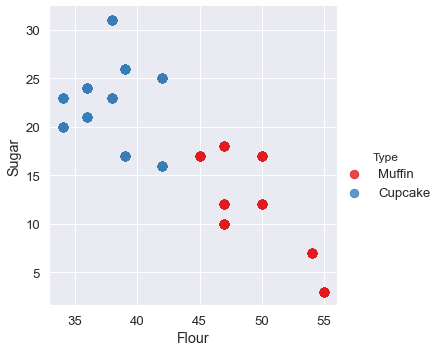

In [12]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

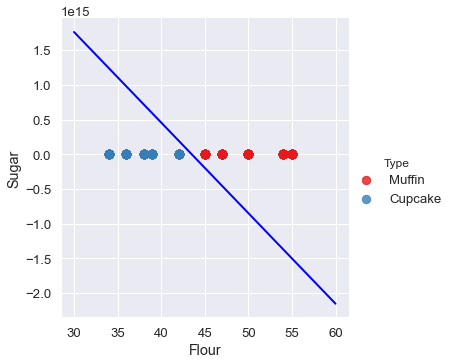

In [10]:
ingredients = recipes[['Flour','Sugar']]
type_label = np.where(recipes['Type']=='Muffin', 0, 1)
recipe_features = recipes.columns.values[1:].tolist()
recipe_features
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]


b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='blue');

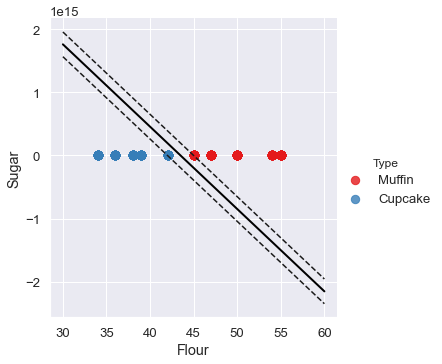

In [11]:
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');